# Tutorials

In this tutorial, we demonstrate how to integrate a mosaic dataset consisting of RNA, ADT, and ATAC data. We will also walk through the inference process and the outputs generated by MIDAS.

## Step 1: Download the Demo Data

In [ ]:
from scmidas.data import download_data
download_data('teadog_mosaic_4k', './dataset')

## Step 2: Set Up the Environment

Before we begin, ensure that the required environment is set up. This includes importing the necessary packages and dependencies.

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

from scmidas.model import MIDAS
from scmidas.utils import load_predicted
import lightning as L
from lightning.pytorch import loggers as pl_loggers

import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

sc.set_figure_params(figsize=(4, 4))

## Step 3: Configure the Model

In this step, we configure the model for our dataset. Since we define the ATAC data as a Bernoulli distribution, we first binarize the data before modeling it with MIDAS.

In [ ]:
task = 'teadog_mosaic_4k'
transfrom = {'atac':'binarize'}
model = MIDAS.configure_data_from_dir('./dataset/'+task+'/data', transfrom, config_name='default')

INFO:root:Input Summary (Mask Density and Number)
INFO:root:
              RNA       ADT ATAC  #Cell
BATCH 0  0.941191         -    1   1000
BATCH 1         -  0.211268    1   1000
BATCH 2  0.954287  0.976526    -   1000
BATCH 3  0.926859  0.976526    1   1000
INFO:root:The model is initialized with the configurations from '/opt/data/private/zjh/code/midas_pl/scmidas/model_config.toml' [default].
INFO:root:Modify this file to change the configurations.


### Step 4: Train the Model (~2h)

After configuring the model, we proceed with training it. This step typically takes around 2 hours, depending on your system.

In [ ]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir='./logs/', version=task)
trainer = L.Trainer(
    accelerator='auto',
    devices=1,
    precision=32,
    strategy='auto',
    num_nodes=1,
    max_epochs=2000,
    logger=tb_logger,
    log_every_n_steps= 5)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
trainer.fit(model=model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type          | Params | Mode 
-----------------------------------------------
0 | net  | VAE           | 49.8 M | train
1 | dsc  | Discriminator | 52.3 K | train
-----------------------------------------------
49.8 M    Trainable params
0         Non-trainable params
49.8 M    Total params
199.357   Total estimated model params size (MB)
676       Modules in train mode
0         Modules in eval mode
INFO:root:Total number of samples: 4000 from 4 datasets.
INFO:root:Using MultiBatchSampler for data loading.
/root/anaconda3/envs/pl/lib/python3.12/site-packages/torch/utils/data/sampler.py:76: UserWarning: `data_source` argument is not used and will be removed in 2.2.0.You may still have custom implementation that utilizes it.
  warnings.warn(
INFO:root:DataLoader created with batch size 256 and 20 workers.


Epoch 500: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s, v_num=c_4k, loss_/recon_loss_step=1.34e+4, loss_/kld_loss_step=130.0, loss_/consistency_loss_step=52.40, loss/net_step=1.35e+4, loss/dsc_step=125.0, loss_/recon_loss_epoch=9.29e+3, loss_/kld_loss_epoch=116.0, loss_/consistency_loss_epoch=34.80, loss/net_epoch=9.33e+3, loss/dsc_epoch=104.0]

INFO:root:Checkpoint successfully saved to './saved_models/model_epoch500_20241210-093404.pt'.
INFO:root:Checkpoint saved for epoch 500 at './saved_models/model_epoch500_20241210-093404.pt'.


Epoch 1000: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s, v_num=c_4k, loss_/recon_loss_step=1.18e+4, loss_/kld_loss_step=122.0, loss_/consistency_loss_step=14.20, loss/net_step=1.19e+4, loss/dsc_step=99.80, loss_/recon_loss_epoch=8.92e+3, loss_/kld_loss_epoch=123.0, loss_/consistency_loss_epoch=26.00, loss/net_epoch=8.96e+3, loss/dsc_epoch=105.0]

INFO:root:Checkpoint successfully saved to './saved_models/model_epoch1000_20241210-100617.pt'.
INFO:root:Checkpoint saved for epoch 1000 at './saved_models/model_epoch1000_20241210-100617.pt'.


Epoch 1500: 100%|██████████| 16/16 [00:03<00:00,  4.22it/s, v_num=c_4k, loss_/recon_loss_step=7.88e+3, loss_/kld_loss_step=120.0, loss_/consistency_loss_step=23.90, loss/net_step=7.93e+3, loss/dsc_step=96.50, loss_/recon_loss_epoch=8.69e+3, loss_/kld_loss_epoch=126.0, loss_/consistency_loss_epoch=23.90, loss/net_epoch=8.74e+3, loss/dsc_epoch=104.0]

INFO:root:Checkpoint successfully saved to './saved_models/model_epoch1500_20241210-103831.pt'.
INFO:root:Checkpoint saved for epoch 1500 at './saved_models/model_epoch1500_20241210-103831.pt'.


Epoch 1999: 100%|██████████| 16/16 [00:03<00:00,  4.02it/s, v_num=c_4k, loss_/recon_loss_step=7.77e+3, loss_/kld_loss_step=121.0, loss_/consistency_loss_step=23.10, loss/net_step=7.82e+3, loss/dsc_step=96.70, loss_/recon_loss_epoch=8.54e+3, loss_/kld_loss_epoch=127.0, loss_/consistency_loss_epoch=23.40, loss/net_epoch=8.59e+3, loss/dsc_epoch=104.0]

`Trainer.fit` stopped: `max_epochs=2000` reached.


Epoch 1999: 100%|██████████| 16/16 [00:03<00:00,  4.01it/s, v_num=c_4k, loss_/recon_loss_step=7.77e+3, loss_/kld_loss_step=121.0, loss_/consistency_loss_step=23.10, loss/net_step=7.82e+3, loss/dsc_step=96.70, loss_/recon_loss_epoch=8.54e+3, loss_/kld_loss_epoch=127.0, loss_/consistency_loss_epoch=23.40, loss/net_epoch=8.59e+3, loss/dsc_epoch=104.0]


INFO:root:Checkpoint successfully saved to './saved_models/model_epoch2000_20241210-111023.pt'.
INFO:root:Checkpoint saved for epoch 2000 at './saved_models/model_epoch2000_20241210-111023.pt'.


## Step 5: Predict

Once the model is trained, we can run predict() to obtain various outputs from MIDAS.

In [ ]:
model.predict('./predict/'+task,         
        joint_latent=True,
        mod_latent=True,
        impute=True,
        batch_correct=True,
        translate=True,
        input=True)

INFO:root:Predicting ...
INFO:root:Processing batch 0: ['atac', 'rna']
100%|██████████| 4/4 [02:44<00:00, 41.21s/it]
INFO:root:Processing batch 1: ['atac', 'adt']
100%|██████████| 4/4 [02:41<00:00, 40.39s/it]
INFO:root:Processing batch 2: ['rna', 'adt']
100%|██████████| 4/4 [02:27<00:00, 36.77s/it]
INFO:root:Processing batch 3: ['atac', 'rna', 'adt']
100%|██████████| 4/4 [02:45<00:00, 41.45s/it]
INFO:root:Calculating u_centroid ...
INFO:root:Loading predicted variables ...
INFO:root:Loading batch 0: z, joint
100%|██████████| 4/4 [00:00<00:00, 196.39it/s]
INFO:root:Loading batch 1: z, joint
100%|██████████| 4/4 [00:00<00:00, 321.46it/s]
INFO:root:Loading batch 2: z, joint
100%|██████████| 4/4 [00:00<00:00, 258.23it/s]
INFO:root:Loading batch 3: z, joint
100%|██████████| 4/4 [00:00<00:00, 223.06it/s]
INFO:root:Converting to numpy ...
INFO:root:Converting batch 0: s, joint
INFO:root:Converting batch 0: z, joint
INFO:root:Converting batch 1: s, joint
INFO:root:Converting batch 1: z, joint


## Step 6: Outputs of MIDAS

In this step, we explore the various outputs generated by MIDAS.
First, we load the cell-type labels associated with the dataset.

In [ ]:
label = []
for i in ['w1', 'w6', 'lll_ctrl', 'dig_stim']:
    label.append(pd.read_csv('./dataset/'+task+'label/%s.csv'%i, index_col=0).values.flatten()[:1000])
label = np.concatenate(label)

### Joint Embeddings

The joint embeddings consist of two components: biological information (c) and technical information (u).
To analyze them, we split the embeddings and visualize them separately.

INFO:root:Loading predicted variables ...
INFO:root:Loading batch 0: z, joint
100%|██████████| 4/4 [00:00<00:00, 191.93it/s]
INFO:root:Loading batch 1: z, joint
100%|██████████| 4/4 [00:00<00:00, 171.40it/s]
INFO:root:Loading batch 2: z, joint
100%|██████████| 4/4 [00:00<00:00, 154.77it/s]
INFO:root:Loading batch 3: z, joint
100%|██████████| 4/4 [00:00<00:00, 161.41it/s]
INFO:root:Converting to numpy ...
INFO:root:Converting batch 0: s, joint
INFO:root:Converting batch 0: z, joint
INFO:root:Converting batch 1: s, joint
INFO:root:Converting batch 1: z, joint
INFO:root:Converting batch 2: s, joint
INFO:root:Converting batch 2: z, joint
INFO:root:Converting batch 3: s, joint
INFO:root:Converting batch 3: z, joint
/root/anaconda3/envs/pl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
... storing 'batch' as

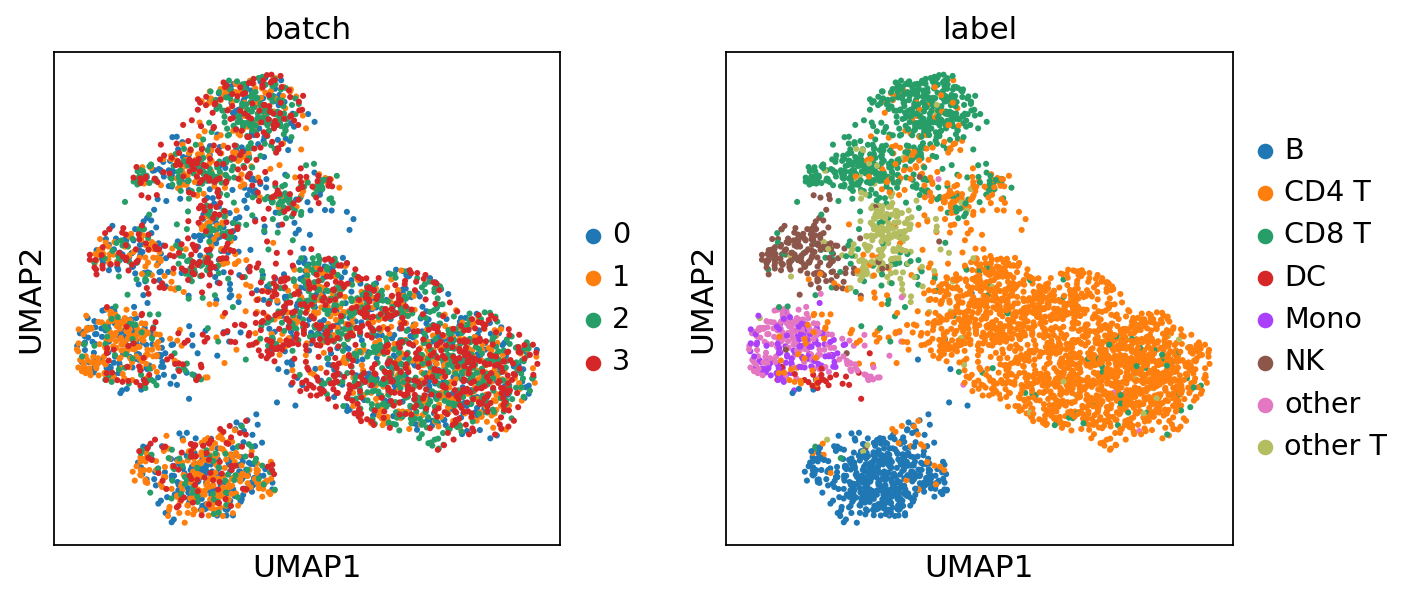

... storing 'batch' as categorical
... storing 'label' as categorical


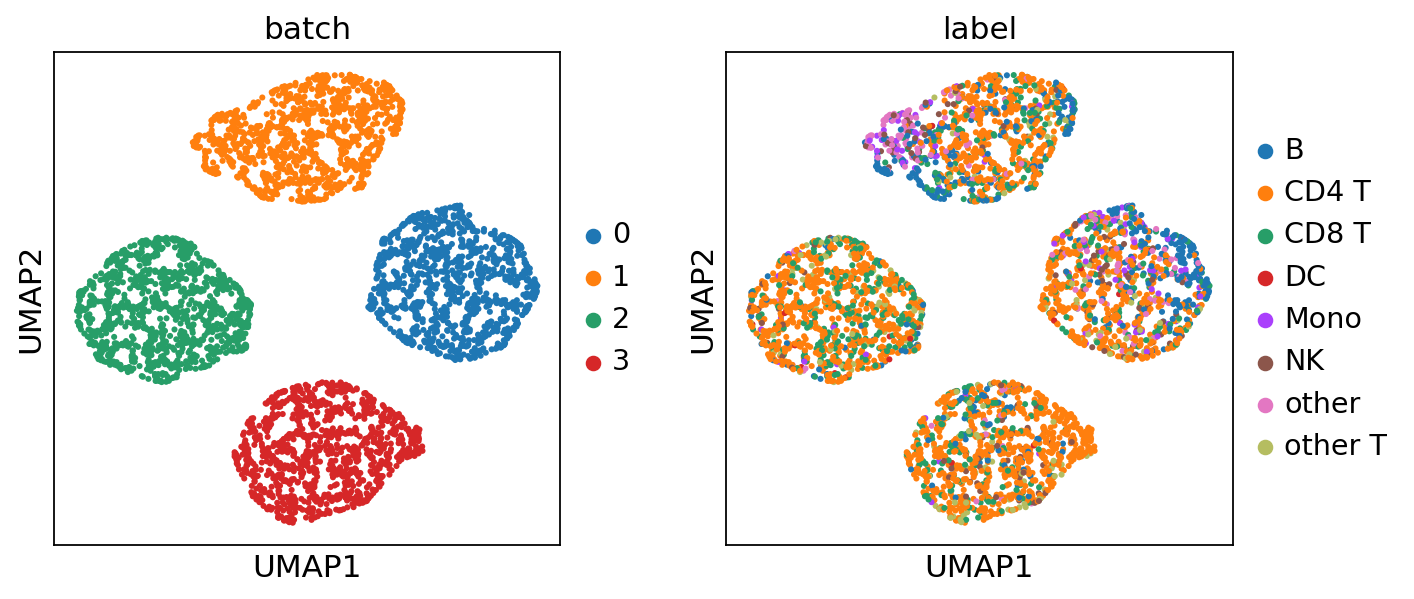

In [ ]:
#check the batch effect of raw counts (RNA)
joint_embeddings = load_predicted('./predict/'+task, model.s_joint, model.combs, model.mods, joint_latent=True)

adata_bio = sc.AnnData(joint_embeddings['z']['joint'][:, :model.dim_c])
adata_tech = sc.AnnData(joint_embeddings['z']['joint'][:, model.dim_c:])

adata_bio.obs['batch'] = joint_embeddings['s']['joint'].astype('int').astype('str')
adata_bio.obs['label'] = label
adata_tech.obs['batch'] = joint_embeddings['s']['joint'].astype('int').astype('str')
adata_tech.obs['label'] = label

for adata in [adata_bio, adata_tech]:
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color=['batch', 'label'], ncols=2)

For quick visualization of the joint embeddings, we provide an API that allows for efficient plotting.

INFO:root:Loading predicted data from: ./predict/./demo/teadog_mosaic_4k
INFO:root:Loading predicted variables ...
INFO:root:Loading batch 0: z, joint
100%|██████████| 4/4 [00:00<00:00, 156.91it/s]
INFO:root:Loading batch 1: z, joint
100%|██████████| 4/4 [00:00<00:00, 152.58it/s]
INFO:root:Loading batch 2: z, joint
100%|██████████| 4/4 [00:00<00:00, 173.33it/s]
INFO:root:Loading batch 3: z, joint
100%|██████████| 4/4 [00:00<00:00, 166.68it/s]
INFO:root:Converting to numpy ...
INFO:root:Converting batch 0: s, joint
INFO:root:Converting batch 0: z, joint
INFO:root:Converting batch 1: s, joint
INFO:root:Converting batch 1: z, joint
INFO:root:Converting batch 2: s, joint
INFO:root:Converting batch 2: z, joint
INFO:root:Converting batch 3: s, joint
INFO:root:Converting batch 3: z, joint
INFO:root:Processing biological embedding...
INFO:root: - Computing neighbors...
INFO:root: - Computing UMAP...
INFO:root: - Generating UMAP plot for biological_embedding.png...
... storing 'batch' as catego

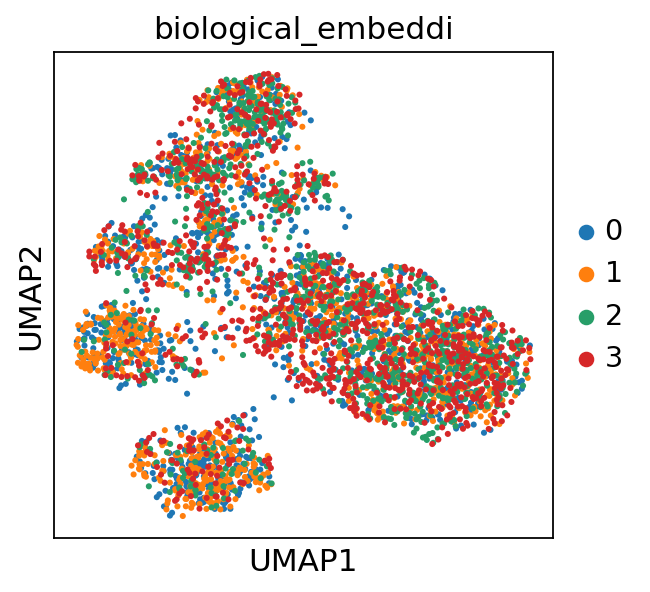

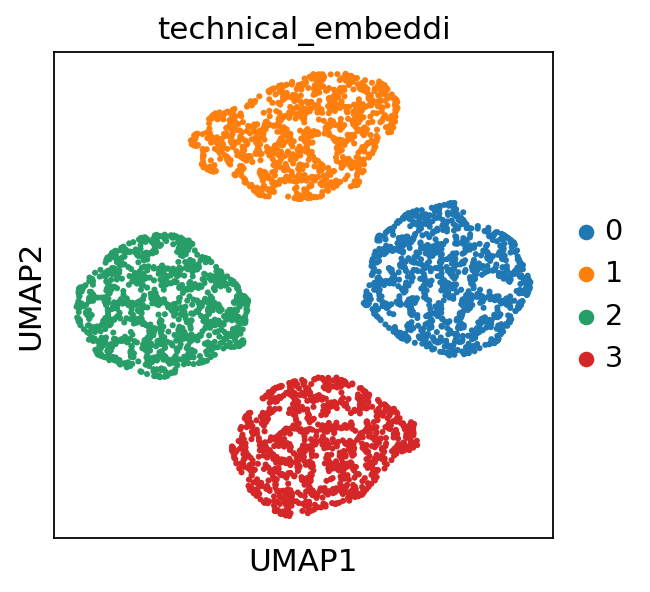

In [ ]:
adata, _ = model.get_emb_umap('./predict/'+task)

### Modality-Specific Embeddings

Here, we check the alignment among modalities by visualizing them with UMAP.

In [ ]:
mod_embeddings = load_predicted('./predict/'+task, model.s_joint, model.combs, model.mods, mod_latent=True, group_by='batch')
adata_list = []
for i in range(model.dims_s['joint']):
    for m in model.mods+['joint']:
        if m in mod_embeddings[i]['z']:
            adata = sc.AnnData(mod_embeddings[i]['z'][m][:, :model.dim_c])
            adata.obs['batch'] = 'BATCH '+str(i)
            adata.obs['modality'] = m
            adata.obs['label'] = label[(i*1000):((i+1)*1000)]
            adata_list.append(adata)
adata_mod_concat = sc.concat(adata_list)
for i in adata_mod_concat.obs:
    adata_mod_concat.obs[i] = adata_mod_concat.obs[i].astype('category')
sc.pp.neighbors(adata_mod_concat)
sc.tl.umap(adata_mod_concat)

INFO:root:Loading predicted variables ...
INFO:root:Loading batch 0: z, joint
100%|██████████| 4/4 [00:00<00:00, 187.52it/s]
INFO:root:Loading batch 0: z, atac
100%|██████████| 4/4 [00:00<00:00, 189.86it/s]
INFO:root:Loading batch 0: z, rna
100%|██████████| 4/4 [00:00<00:00, 205.42it/s]
INFO:root:Loading batch 1: z, joint
100%|██████████| 4/4 [00:00<00:00, 154.24it/s]
INFO:root:Loading batch 1: z, atac
100%|██████████| 4/4 [00:00<00:00, 176.21it/s]
INFO:root:Loading batch 1: z, adt
100%|██████████| 4/4 [00:00<00:00, 254.99it/s]
INFO:root:Loading batch 2: z, joint
100%|██████████| 4/4 [00:00<00:00, 153.29it/s]
INFO:root:Loading batch 2: z, rna
100%|██████████| 4/4 [00:00<00:00, 258.52it/s]
INFO:root:Loading batch 2: z, adt
100%|██████████| 4/4 [00:00<00:00, 309.75it/s]
INFO:root:Loading batch 3: z, joint
100%|██████████| 4/4 [00:00<00:00, 160.34it/s]
INFO:root:Loading batch 3: z, atac
100%|██████████| 4/4 [00:00<00:00, 239.12it/s]
INFO:root:Loading batch 3: z, rna
100%|██████████| 4/4 [

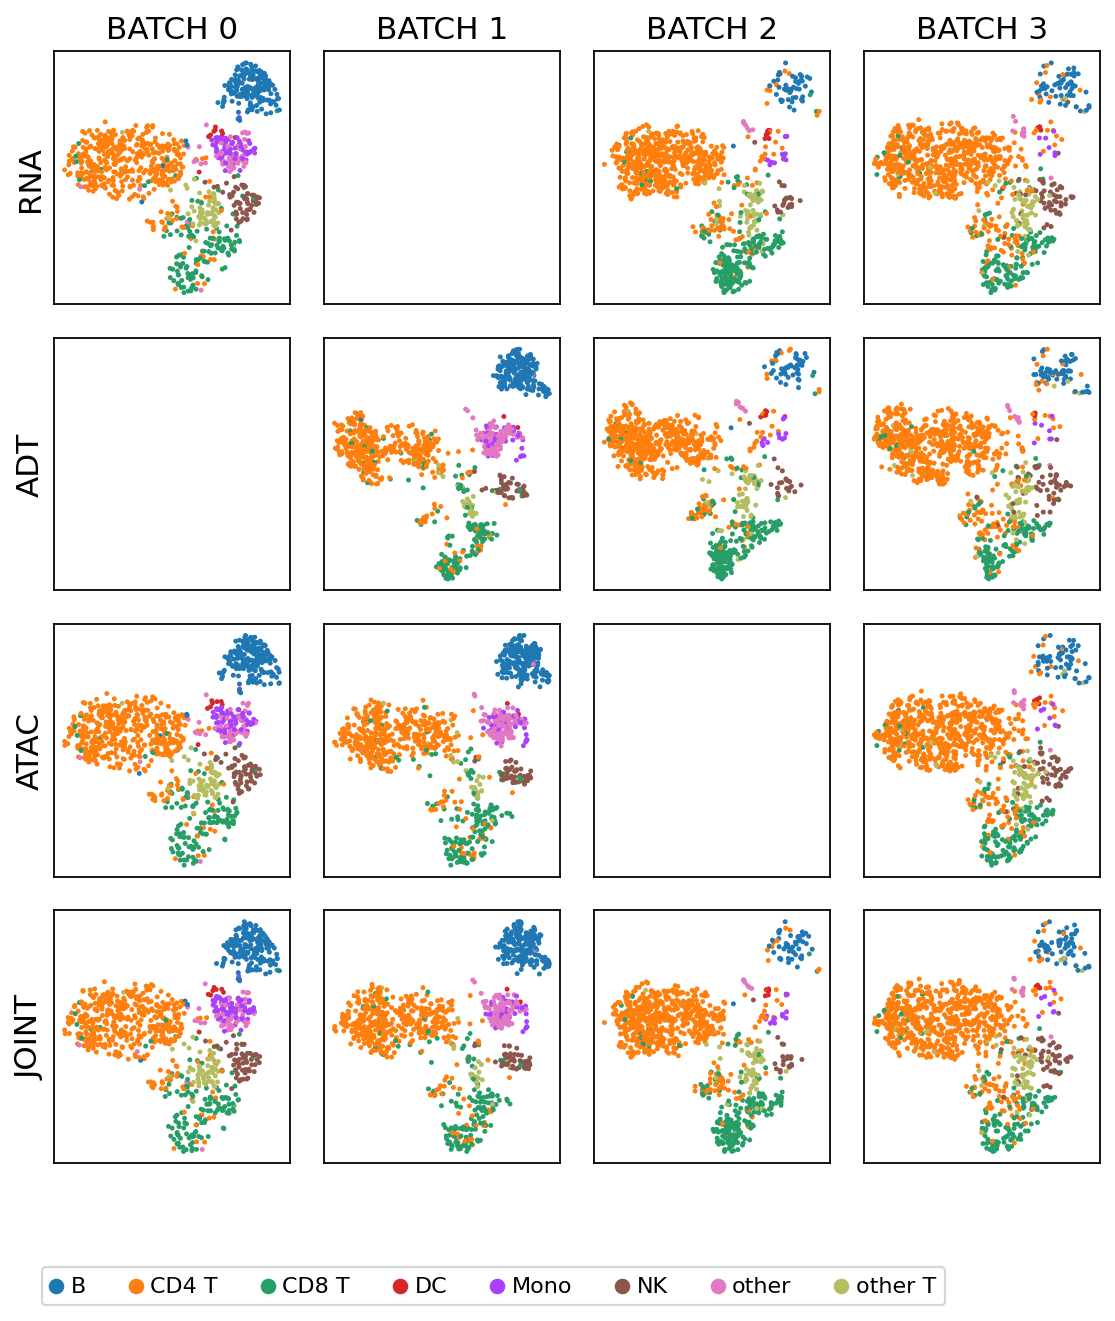

In [ ]:
# setup figure
nrows = len(model.mods) + 1
ncols = model.dims_s['joint']
point_size = 20

fig, ax = plt.subplots(nrows, ncols, figsize=[2 * ncols, 2 * nrows])

# set up the name of modalities and batch
mod_names = model.mods + ['joint']
batch_names = [f'Batch {b}' for b in range(model.dims_s['joint'])]

# iteratively scatter the data
for i, mod in enumerate(mod_names):
    for b in range(model.dims_s['joint']):
        # filter data
        adata = adata_mod_concat[
            (adata_mod_concat.obs['modality'] == mod) & 
            (adata_mod_concat.obs['batch'] == 'BATCH '+str(b))
        ].copy()
        if len(adata):
            sc.pl.umap(adata, color='label', show=False, ax=ax[i, b], s=point_size)
            ax[i, b].get_legend().set_visible(False)
            handles, labels = ax[i, b].get_legend_handles_labels()
        ax[i, b].set_xticks([])
        ax[i, b].set_yticks([])
        ax[i, b].set_xlabel('')
        if b==0:
            ax[i, b].set_ylabel(mod.upper())
        else:
            ax[i, b].set_ylabel('')
        if i==0:
            ax[i, b].set_title('BATCH '+str(b))
        else:
            ax[i, b].set_title('')
# create global legend
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.02), ncol=len(labels), fontsize=10)

# adjust the figure
plt.tight_layout(rect=[0.1, 0.05, 1, 1])
plt.show()

### Inputs

We also retrieve the output of the dataset instance. Note that if a transformation has been applied (e.g., binarization), the resulting data may differ from the raw data.

INFO:root:Loading predicted variables ...
INFO:root:Loading batch 0: z, joint
100%|██████████| 4/4 [00:00<00:00, 213.66it/s]
INFO:root:Loading batch 0: x, atac
100%|██████████| 4/4 [00:02<00:00,  1.43it/s]
INFO:root:Loading batch 0: x, rna
100%|██████████| 4/4 [00:00<00:00,  5.75it/s]
INFO:root:Loading batch 1: z, joint
100%|██████████| 4/4 [00:00<00:00, 221.53it/s]
INFO:root:Loading batch 1: x, atac
100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
INFO:root:Loading batch 1: x, adt
100%|██████████| 4/4 [00:00<00:00, 19.54it/s]
INFO:root:Loading batch 2: z, joint
100%|██████████| 4/4 [00:00<00:00, 289.00it/s]
INFO:root:Loading batch 2: x, rna
100%|██████████| 4/4 [00:01<00:00,  2.46it/s]
INFO:root:Loading batch 2: x, adt
100%|██████████| 4/4 [00:00<00:00, 86.85it/s]
INFO:root:Loading batch 3: z, joint
100%|██████████| 4/4 [00:00<00:00, 211.86it/s]
INFO:root:Loading batch 3: x, atac
100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
INFO:root:Loading batch 3: x, rna
100%|██████████| 4/4 [00:00<0

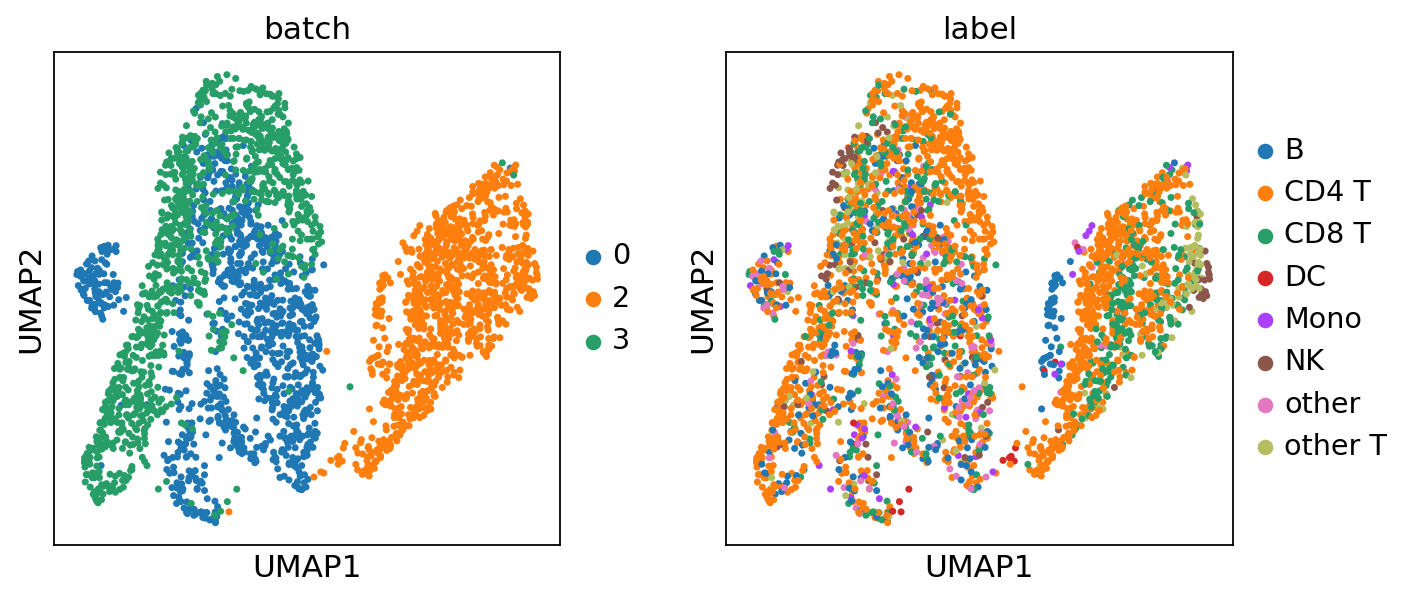

In [ ]:
#check the batch effect of raw counts (RNA)
raw_data = load_predicted('./predict/'+task, model.s_joint, model.combs, model.mods, input=True)
raw_data_adata = sc.AnnData(raw_data['x']['rna'])
raw_data_adata.obs['batch'] = raw_data['s']['joint'].astype('int').astype('str')[list(range(1000))+list(range(2000,4000))]
raw_data_adata.obs['label'] = label[1000:]
raw_data_adata
sc.pp.neighbors(raw_data_adata)
sc.tl.umap(raw_data_adata)
sc.pl.umap(raw_data_adata, color=['batch', 'label'], ncols=2)

### Batch-Corrected Counts

This step generates batch-corrected counts. These counts will differ from the raw counts, as they are adjusted using a standard noise model to remove batch effects.

INFO:root:Loading predicted variables ...
INFO:root:Loading batch 0: z, joint
100%|██████████| 4/4 [00:00<00:00, 193.93it/s]
INFO:root:Loading batch 0: x_bc, rna
100%|██████████| 4/4 [00:00<00:00, 17.70it/s]
INFO:root:Loading batch 0: x_bc, adt
100%|██████████| 4/4 [00:00<00:00, 190.23it/s]
INFO:root:Loading batch 0: x_bc, atac
100%|██████████| 4/4 [00:01<00:00,  2.89it/s]
INFO:root:Loading batch 1: z, joint
100%|██████████| 4/4 [00:00<00:00, 114.97it/s]
INFO:root:Loading batch 1: x_bc, rna
100%|██████████| 4/4 [00:00<00:00, 15.93it/s]
INFO:root:Loading batch 1: x_bc, adt
100%|██████████| 4/4 [00:00<00:00, 18.94it/s]
INFO:root:Loading batch 1: x_bc, atac
100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
INFO:root:Loading batch 2: z, joint
100%|██████████| 4/4 [00:00<00:00, 32.84it/s]
INFO:root:Loading batch 2: x_bc, rna
100%|██████████| 4/4 [00:00<00:00, 19.57it/s]
INFO:root:Loading batch 2: x_bc, adt
100%|██████████| 4/4 [00:00<00:00, 135.82it/s]
INFO:root:Loading batch 2: x_bc, atac
100%

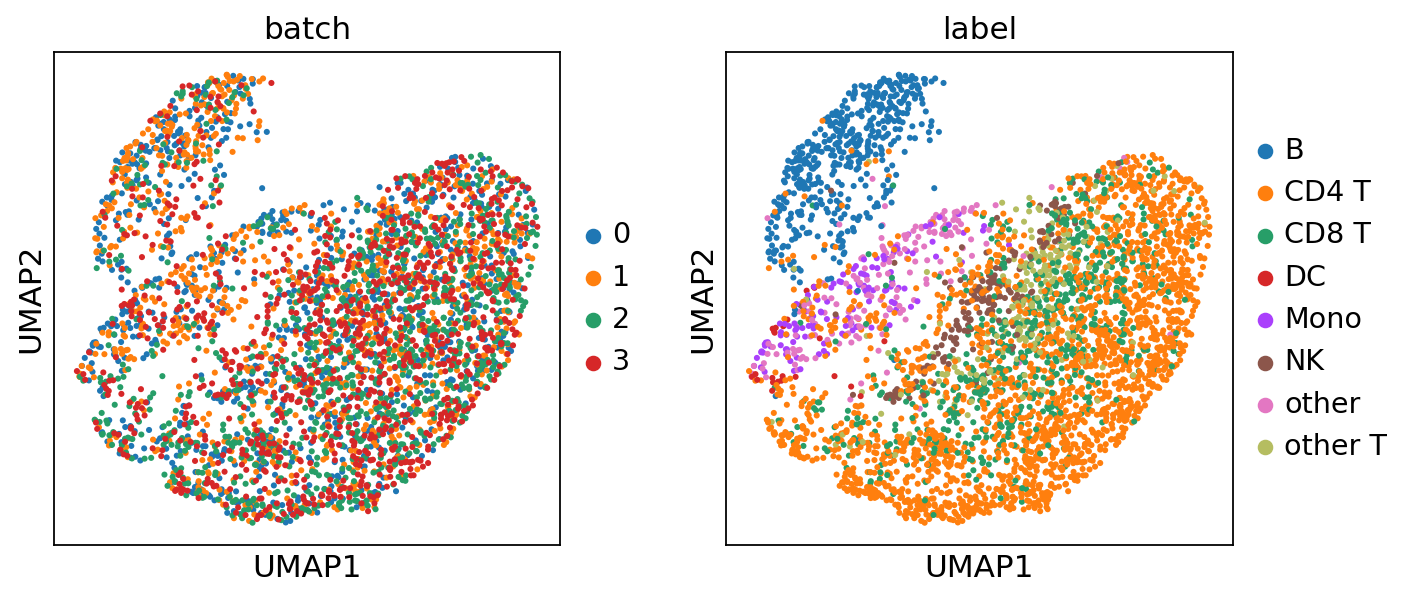

In [ ]:
#check the batch effect of MIDAS's batch-corrected counts (RNA)
batch_corrected = load_predicted('./predict/'+task, model.s_joint, model.combs, model.mods, batch_correct=True)
batch_corrected_adata = sc.AnnData(batch_corrected['x_bc']['rna'])
batch_corrected_adata.obs['batch'] = batch_corrected['s']['joint'].astype('int').astype('str')
batch_corrected_adata.obs['label'] = label
batch_corrected_adata
sc.pp.neighbors(batch_corrected_adata)
sc.tl.umap(batch_corrected_adata)
sc.pl.umap(batch_corrected_adata, color=['batch', 'label'], ncols=2)

### Imputed Counts

Here, we retrieve the imputed counts, which are the completed counts. As an example, we examine the ADT data from batch 0 to compare the predicted counts with the raw counts and assess their similarity.

In [ ]:
imputed = load_predicted('./predict/'+task, model.s_joint, model.combs, model.mods, impute=True)

INFO:root:Loading predicted variables ...
INFO:root:Loading batch 0: z, joint
100%|██████████| 4/4 [00:00<00:00, 141.95it/s]
INFO:root:Loading batch 0: x_impt, rna
100%|██████████| 4/4 [00:01<00:00,  3.33it/s]
INFO:root:Loading batch 0: x_impt, adt
100%|██████████| 4/4 [00:00<00:00, 55.30it/s]
INFO:root:Loading batch 0: x_impt, atac
100%|██████████| 4/4 [00:07<00:00,  1.75s/it]
INFO:root:Loading batch 1: z, joint
100%|██████████| 4/4 [00:00<00:00, 155.10it/s]
INFO:root:Loading batch 1: x_impt, rna
100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
INFO:root:Loading batch 1: x_impt, adt
100%|██████████| 4/4 [00:00<00:00, 45.07it/s]
INFO:root:Loading batch 1: x_impt, atac
100%|██████████| 4/4 [00:06<00:00,  1.73s/it]
INFO:root:Loading batch 2: z, joint
100%|██████████| 4/4 [00:01<00:00,  2.50it/s]
INFO:root:Loading batch 2: x_impt, rna
100%|██████████| 4/4 [00:01<00:00,  3.60it/s]
INFO:root:Loading batch 2: x_impt, adt
100%|██████████| 4/4 [00:00<00:00, 49.60it/s]
INFO:root:Loading batch 2: x

In [ ]:
ref_adt = pd.read_csv('./dataset/'+task+'/data/batch_0/mat/adt.csv', index_col=0).iloc[:1000].values
pearsonr(ref_adt.reshape(-1), imputed['x_impt']['adt'][:1000].reshape(-1))[0]

0.4701666366653919

### Translated Counts

Similar to the imputed counts, the translated counts are generated when only a subset of modalities is used as input. These counts are produced by transforming the data from some modalities into another, allowing for cross-modality predictions.

In [ ]:
translated = load_predicted('./predict/'+task, model.s_joint, model.combs, model.mods, translate=True)

INFO:root:Loading predicted variables ...
INFO:root:Loading batch 0: z, joint
100%|██████████| 4/4 [00:00<00:00, 162.97it/s]
INFO:root:Loading batch 0: x_trans, rna_to_atac
100%|██████████| 4/4 [00:06<00:00,  1.73s/it]
INFO:root:Loading batch 0: x_trans, rna_to_adt
100%|██████████| 4/4 [00:00<00:00, 33.14it/s]
INFO:root:Loading batch 0: x_trans, adt_to_atac
100%|██████████| 4/4 [00:06<00:00,  1.70s/it]
INFO:root:Loading batch 0: x_trans, adt_to_rna
100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
INFO:root:Loading batch 0: x_trans, atac_to_adt
100%|██████████| 4/4 [00:00<00:00, 59.56it/s]
INFO:root:Loading batch 0: x_trans, atac_to_rna
100%|██████████| 4/4 [00:01<00:00,  3.17it/s]
INFO:root:Loading batch 0: x_trans, adt_rna_to_atac
100%|██████████| 4/4 [00:05<00:00,  1.49s/it]
INFO:root:Loading batch 0: x_trans, atac_rna_to_adt
100%|██████████| 4/4 [00:02<00:00,  1.76it/s]
INFO:root:Loading batch 0: x_trans, adt_atac_to_rna
100%|██████████| 4/4 [00:01<00:00,  3.49it/s]
INFO:root:Loading b

In [24]:
pearsonr(ref_adt.reshape(-1), translated['x_trans']['rna_to_adt'][:1000].reshape(-1))[0]

0.4737357049741813